In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
ticker = "NVDA"
api_key = "IF34367LP8LME7BE"
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&apikey={api_key}&datatype=csv"
data = pd.read_csv(url)
print(data)

     timestamp     open    high       low   close     volume
0   2025-07-09  161.160  164.42  161.1600  162.88  182308598
1   2025-07-08  159.330  160.22  158.3900  160.00  138133025
2   2025-07-07  158.200  159.31  157.3420  158.24  140138975
3   2025-07-03  158.370  160.98  157.7700  159.34  143716055
4   2025-07-02  152.980  157.60  152.9700  157.25  171224111
..         ...      ...     ...       ...     ...        ...
95  2025-02-20  140.030  140.66  136.7901  140.11  143903583
96  2025-02-19  139.510  141.36  137.2200  139.23  167536006
97  2025-02-18  141.270  143.44  137.9250  139.40  219176627
98  2025-02-14  136.480  139.25  135.5000  138.85  195479557
99  2025-02-13  131.555  136.50  131.1700  135.29  197429975

[100 rows x 6 columns]


In [4]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.sort_values('timestamp')

data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['dayofweek'] = data['timestamp'].dt.dayofweek
data.drop(columns=['timestamp'], inplace=True)

In [5]:
data['close_lag_1'] = data['close'].shift(1)
data['close_lag_2'] = data['close'].shift(2)

In [6]:
data = data.dropna()

In [7]:
X = data.drop(columns=['close'])
y = data['close']

In [8]:
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [9]:
print(X.dtypes)

open           float64
high           float64
low            float64
volume           int64
year             int32
month            int32
day              int32
dayofweek        int32
close_lag_1    float64
close_lag_2    float64
dtype: object


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

In [ ]:
# Model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.7121
RMSE: 0.8646
R² Score: 0.9846


In [22]:
# Model parameters
print("Intercept:", model.intercept_)
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nFeature Coefficients:\n", coef_df)

Intercept: 119.65628205128199

Feature Coefficients:
        Feature   Coefficient
0         open -9.933329e+00
1         high  1.048809e+01
2          low  1.240655e+01
3       volume  1.274927e-01
4         year -1.776357e-14
5        month  3.225500e-02
6          day -8.540216e-04
7    dayofweek  1.570085e-01
8  close_lag_1  1.212895e+00
9  close_lag_2 -1.280002e+00


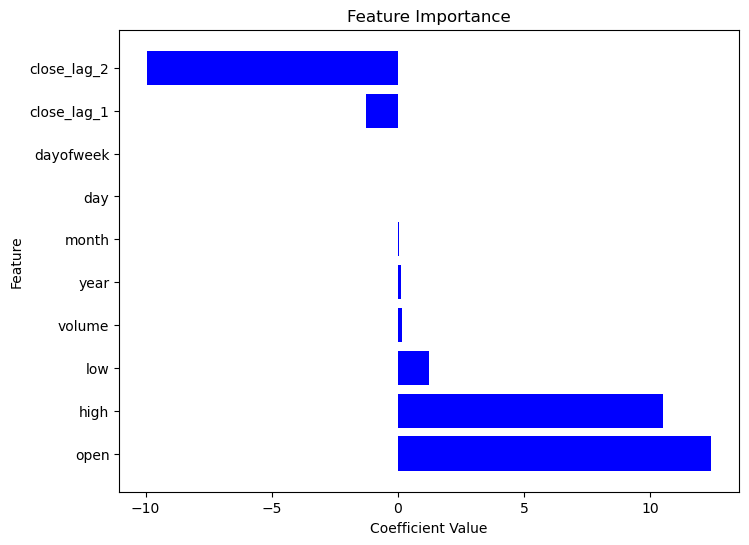

In [24]:
coef_df_sorted = coef_df.sort_values(by="Coefficient", ascending=False)
plt.figure(figsize=(8,6))
plt.barh(coef_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

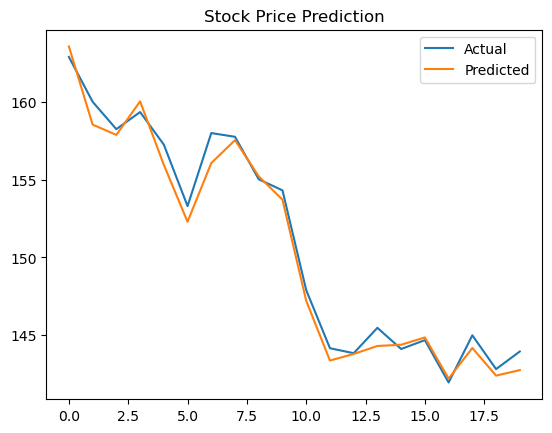

In [16]:
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.legend()
plt.title('Stock Price Prediction')
plt.show()